_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

![](https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png?w=575)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

Quick way to explore the above visualization, is to make fake data based on estimated y-axis data

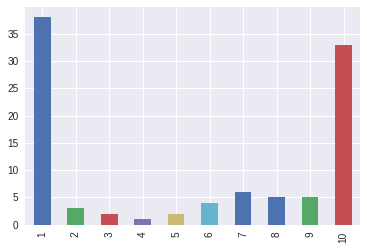

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11) )

fake.plot.bar()

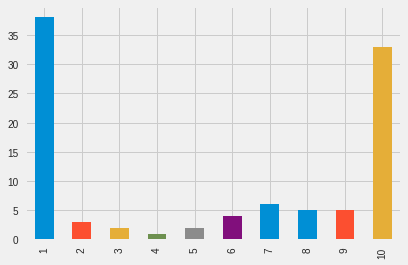

In [2]:
#plt.style.available
plt.style.use('fivethirtyeight')

fake.plot.bar();


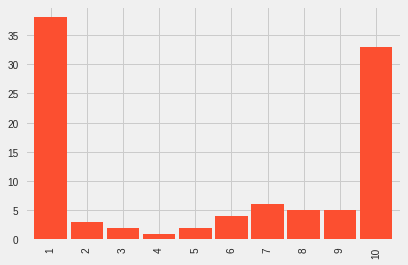

In [3]:
fake.plot.bar(color='C1',width=0.9);

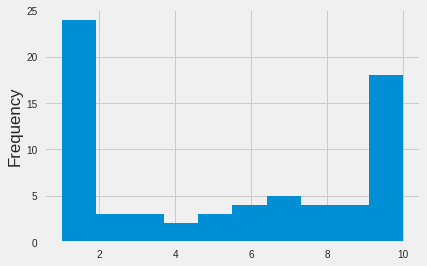

In [4]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.plot.hist()

In [9]:
fake2.value_counts().sort_index()


1     24
2      3
3      3
4      2
5      3
6      4
7      5
8      4
9      4
10    18
dtype: int64

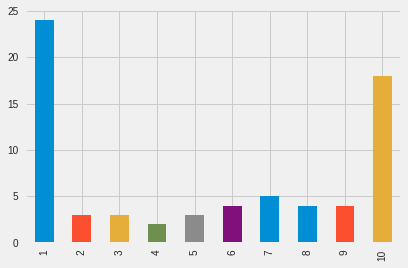

In [11]:
fake2.value_counts().sort_index().plot.bar()

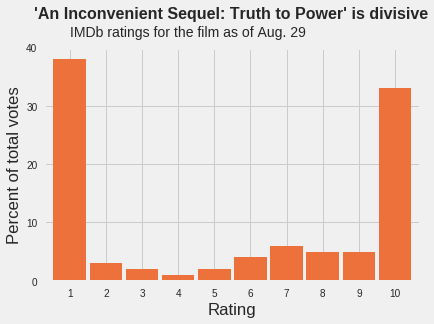

In [29]:
# To reproduce Inconvenient Truth chart using fake data

plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                index=range(1,11))

ax = fake.plot.bar(color='#EC713B', width=0.9);

ax.set(
  xlabel='Rating',
  ylabel='Percent of total votes',
  yticks=range(0,50,10));

ax.text(x=-1, y=45, s="'An Inconvenient Sequel: Truth to Power' is divisive",
       fontsize=16, fontweight='bold')
ax.text(x=0, y=42, s='IMDb ratings for the film as of Aug. 29')

ax.tick_params(labelrotation=0)

In [30]:
# To reproduce Inconvenient Truth chart, using real data
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

df.shape

(80053, 27)

In [32]:
pd.options.display.max_columns=None
df.head(1)

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6


In [107]:
df.iloc[0:2] # from index[0] / row[0] to 2 rows
# df.iloc[:1] # same as df.head(1), return index[0] rows

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8


In [33]:
df.head(1).T # T for transpose

,0
timestamp,2017-07-17 12:28:32.785639
respondents,402
category,Males
link,http://www.imdb.com/title/tt6322922/ratings-male
average,4.6
mean,5
median,2
1_votes,197
2_votes,7
3_votes,7


In [35]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-08-18 13:50:05.641163
freq                               1
Name: timestamp, dtype: object

In [39]:
# to convert timestamp from dtype object to datetime object, 
# so that datetime object sort according to time

df.timestamp = pd.to_datetime(df.timestamp)
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
# make timestamp as an index
df.set_index('timestamp', inplace=True)

In [50]:
# pandas allow pattern matching on index
df['2017-08-29'].head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# to explore distinct categorical value, use value_counts
#df.category.value_counts()
#df.link.value_counts()

# using pandas string pattern to filter category
df[df.category == 'IMDb users'].tail()


,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# extract last day 8/29/17 based on timestamp from datasource
lastday = df['2017-08-29']

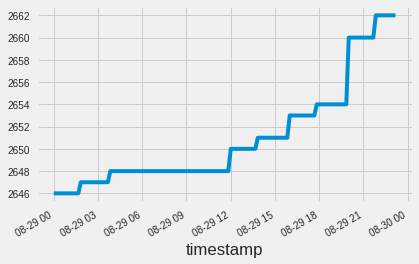

In [53]:
# lastday 8/29/17 IMBd users voting by hours
lastday[lastday.category == 'IMDb users'].respondents.plot();

In [54]:
# extract the last index of data because it contained the final percentage of voting.
final = df.tail(1)

columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct', 
           '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']

final[columns]

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [135]:
final[columns].iloc[0]

1_pct     38.4
2_pct      2.6
3_pct      1.4
4_pct      0.9
5_pct      2.1
6_pct      4.1
7_pct      5.8
8_pct      5.5
9_pct      5.5
10_pct    33.7
Name: 2017-08-29 23:10:06.218251, dtype: float64

In [140]:
type(final[columns])

pandas.core.frame.DataFrame

In [138]:
type(final[columns].iloc[0])

pandas.core.series.Series

In [0]:
final_series=final[columns].iloc[0]
final_series.index = range(1,11)


In [112]:
type(fake)

pandas.core.series.Series

In [0]:
# to highlight important data from non-immportant data
colors = ['#333333'] * 10

In [133]:
#colors.sex_index(range(1,11), inplace=True)
colors[0] = '#EC713B'   # first bar chart
colors[-1] = '#EC713B'  #last bar chart
colors

['#EC713B',
 '#333333',
 '#333333',
 '#333333',
 '#333333',
 '#333333',
 '#333333',
 '#333333',
 '#333333',
 '#EC713B']

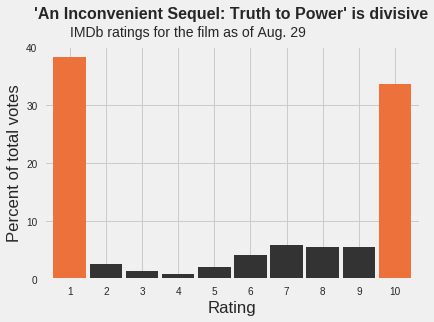

In [142]:
# reproduce Inconvenient Truth using xdata based on accumulative percentage from real data

plt.style.use('fivethirtyeight')

final_series=final[columns].iloc[0]
final_series.index = range(1,11)

#ax = show highlight callout
ax = final_series.plot.bar(color=colors, width=0.9);

ax.set(
  xlabel='Rating',
  ylabel='Percent of total votes',
  yticks=range(0,50,10));

ax.text(x=-1, y=45, s="'An Inconvenient Sequel: Truth to Power' is divisive",
       fontsize=16, fontweight='bold')
ax.text(x=0, y=42, s='IMDb ratings for the film as of Aug. 29')

ax.tick_params(labelrotation=0)


HomeWork - Reproduced Share of IMDb reviews posted graph

In [20]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-21.png'
example = Image(url=url, width=400)

display(example)

In [225]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df.head(1)

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6


In [0]:
# copy() ensure pandas this is a copy not a view. 
# Otherwise subsequent update to this copy, will trigger 
# SettingWithCopyWarnings from pandas.

IMDb_users = df[df.category == 'IMDb users'].copy() 

# find IMDb-users category, then get respondents
#df.loc(df.category == 'IMDb users', respondents) 
#df[ ['category','respondents']] # extracting category, respondents
# df[ (df.category == 'IMDb users') ]['respondents'] # extracting only IMDb_users respondents
#df[df.category == 'IMDb users'].respondents


In [234]:
df[ df.category == 'IMDb users'].shape

(4216, 27)

In [0]:
IMDb_users['respondents_percent'] =(IMDb_users.respondents / 2662) *100 ;


In [236]:
IMDb_users['respondents_percent'].describe()

count    4216.000000
mean       79.422840
std        19.155245
min        25.469572
25%        70.586026
50%        85.649887
75%        94.027047
max       100.000000
Name: respondents_percent, dtype: float64

In [237]:
# convert timestamp object into datatime, so that it can be turned into index
IMDb_users.timestamp = pd.to_datetime(IMDb_users.timestamp)
IMDb_users.timestamp.describe()

count                           4216
unique                          4216
top       2017-08-27 11:30:07.192640
freq                               1
first     2017-07-17 12:28:36.697246
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
IMDb_users.set_index('timestamp', inplace=True)


In [0]:
final = IMDb_users.respondents_percent

In [240]:
final[(final > 30)].head(2)


timestamp
2017-07-24 04:00:05.820301    30.090158
2017-07-24 05:00:05.842771    30.090158
Name: respondents_percent, dtype: float64

In [243]:
pd.to_datetime('2017-08-03')

Timestamp('2017-08-03 00:00:00')

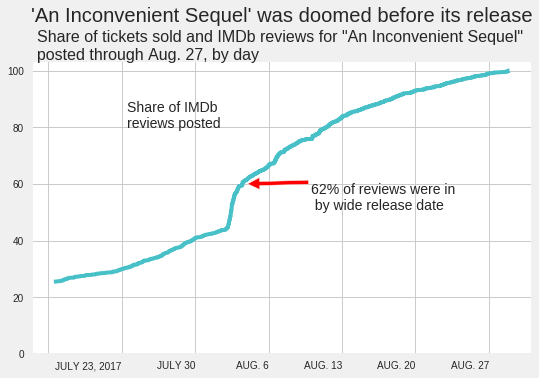

In [256]:
import matplotlib.ticker as ticker

plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 6))
plt.title(s = "'An Inconvenient Sequel' was doomed before its release",
          x = 0,
          y = 1.11,
          ha = 'left')
plt.suptitle(t = 'Share of tickets sold and IMDb reviews for "An Inconvenient Sequel"\nposted through Aug. 27, by day',
             x = 0.09,
             y = 0.95,
             fontsize = 16,
             fontweight = 'ultralight',
             ha = 'left')

ax = final.plot.line(color = '#47C0C7');

# Change background colors
ax.set_facecolor('w')

ax.set(xlabel = '',
       ylabel = '',
       yticks = range(0, 101, 20))

#ax.axhline(y=50,label='xxxx')
#ax.axvline(x='2017-08-03 13:50:07.472812', label='yyy')

ax.text(x='2017-07-24 11:00:06.206173',
       y=80,
       s='Share of IMDb\nreviews posted')


ax.annotate('62% of reviews were in\n by wide release date',
            xytext = (pd.to_datetime('2017-08-11'), 51), 
            xy = (pd.to_datetime('2017-08-05'), 60),  # arrow position
            arrowprops=dict(facecolor='red')
            )
 
xlabels = ['', 'JULY 23, 2017', 'JULY 30', 'AUG. 6', 'AUG. 13', 'AUG. 20', 'AUG. 27']
@ticker.FuncFormatter
def major_formatter(x, pos):
  return xlabels[pos]
  
ax.xaxis.set_major_formatter(major_formatter)



ax.tick_params(labelrotation = 0)
plt.show()
